# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) train and 30%(7) test data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [74]:
import numpy as np
import pandas as pd

features = list()

with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print("Number of features: {}".format(len(features)))

Number of features: 561


## Obtain the  train data 

In [75]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI_HAR_Dataset/train/X_train.txt', delim_whitespace = True, header = None, names = features)

# squeeze = True returns a series; = False returns a dataframe
X_train['Subject'] = pd.read_csv('UCI_HAR_Dataset/train/subject_train.txt', header = None, squeeze = True)

y_train = pd.read_csv('UCI_HAR_Dataset/train/y_train.txt', names = ['Activity'], squeeze = True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Subject'] = X_train['Subject']  # subject is the person
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,Activity,ActivityName
2183,0.454452,-0.035863,-0.194272,0.226689,0.010138,-0.343536,0.180929,0.015639,-0.369685,0.606806,...,-0.527525,0.005429,-0.993223,-0.747323,-0.805773,0.216962,-0.046968,11,3,WALKING_DOWNSTAIRS


In [76]:
train.shape

(7352, 564)

## Obtain the  test data 

In [77]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
688,0.253894,-0.019549,-0.108537,-0.947653,-0.94153,-0.979922,-0.949212,-0.932369,-0.984209,-0.909554,...,-0.09501,-0.231781,0.145312,-0.016175,0.826863,-0.04398,-0.902635,9,6,LAYING


In [78]:
test.shape

(2947, 564)

# Data Cleaning

## 1. Check for Duplicates

In [79]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [80]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

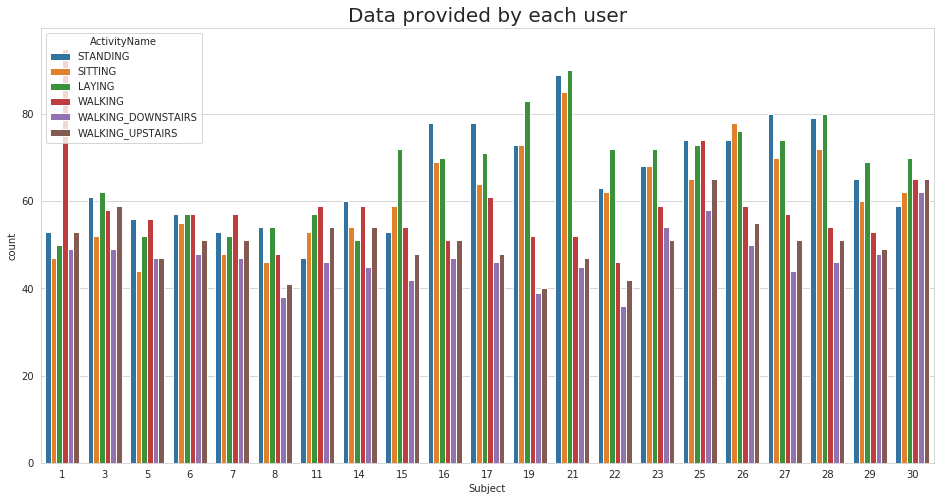

In [82]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(train['Subject'], hue = train['ActivityName'])
plt.show()

We have got almost same number of each of the subjects

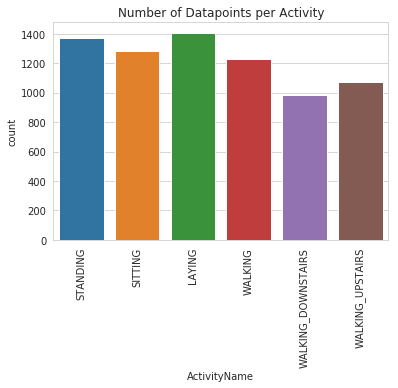

In [83]:
plt.title('Number of Datapoints per Activity', fontsize=12)
sns.countplot(train['ActivityName'])
plt.xticks(rotation = 90)
plt.show()

Our data is well balanced

## 4. Changing feature names 

In [84]:
columns = train.columns

columns = columns.str.replace('[()]', '')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]', '')

train.columns = columns
test.columns = columns

train.columns
                              

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'Subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## 5. Save this dataframe in a csv files

In [85]:
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

# Exploratory Data Analysis

"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"

### 1. Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


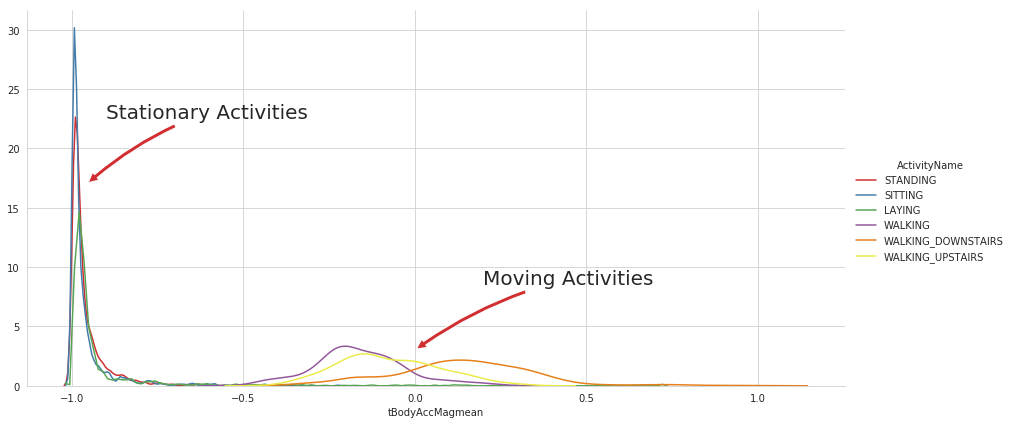

In [86]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue = 'ActivityName', size = 6, aspect = 2)
facetgrid.map(sns.distplot, 'tBodyAccMagmean', hist=False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

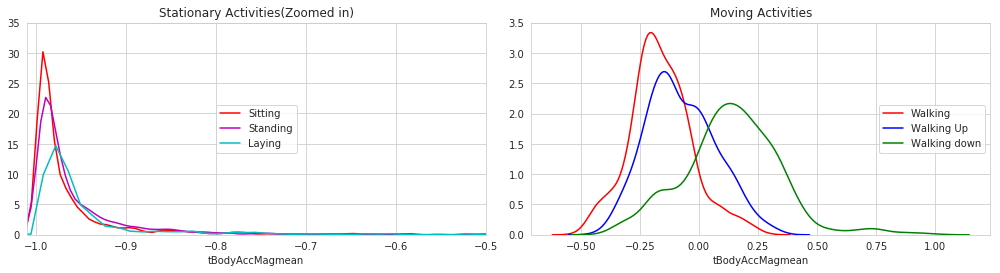

In [87]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

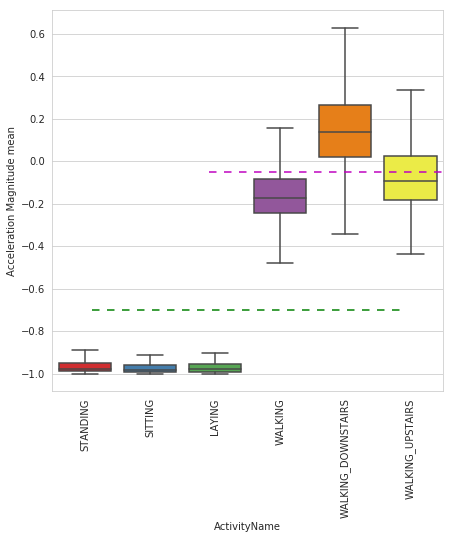

In [88]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

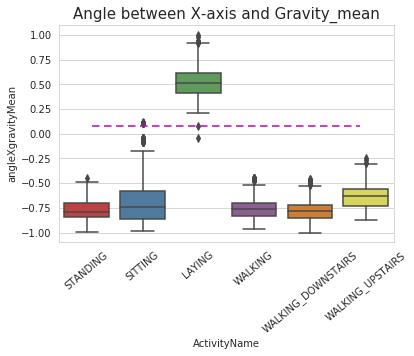

In [89]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

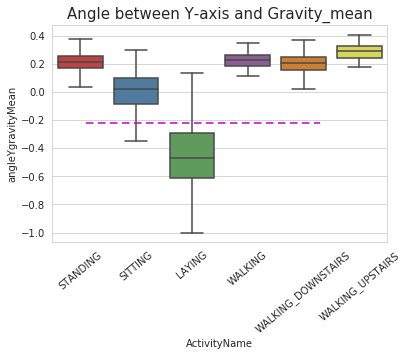

In [90]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Apply t-sne on the data 

In [91]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.539s...
[t-SNE] Computed neighbors for 7352 samples in 80.193s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.105s
[t-SNE] Iteration 50: error = 124.7075348, gradient norm = 0.0254668 (50 iterations in 15.699s)
[t-SNE] Iteration 100: error = 107.1578598, gradient norm = 0.0309414 (50 iterations i

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


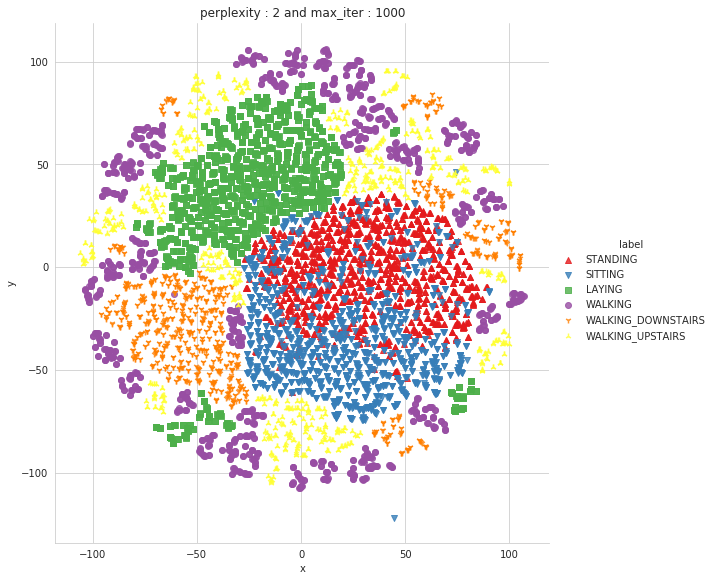

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.460s...
[t-SNE] Computed neighbors for 7352 samples in 82.147s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.160s
[t-SNE] Iteration 50: error = 114.0117874, gradient norm = 0.0206390 (50 iterations in 19.663s)
[t-SNE] Iteration 100: error = 97.4187012, gradient norm = 0.0172915 (50 iterati

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


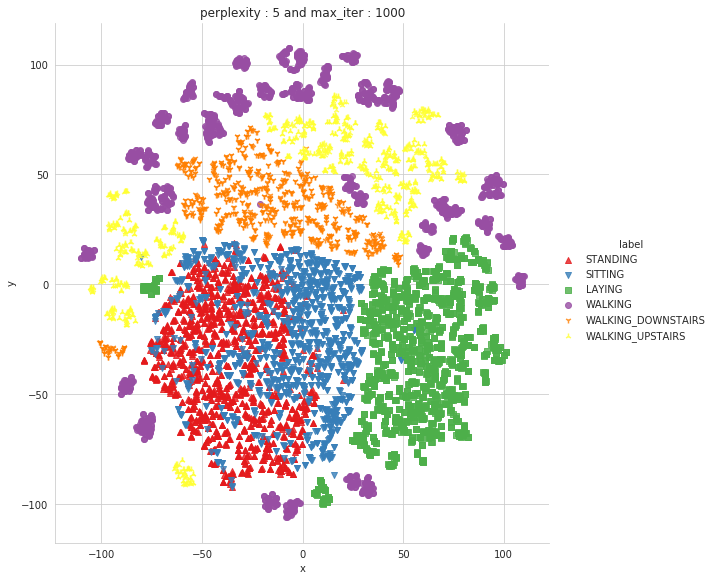

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.493s...
[t-SNE] Computed neighbors for 7352 samples in 83.903s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.229s
[t-SNE] Iteration 50: error = 105.4949722, gradient norm = 0.0231727 (50 iterations in 10.598s)
[t-SNE] Iteration 100: error = 90.4150238, gradient norm = 0.0096489 (50 iterat

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


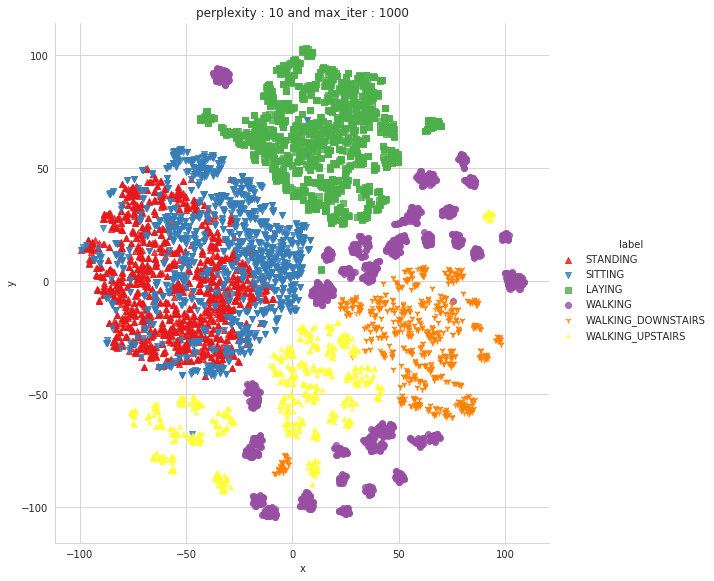

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.441s...
[t-SNE] Computed neighbors for 7352 samples in 84.344s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.402s
[t-SNE] Iteration 50: error = 97.2839050, gradient norm = 0.0227240 (50 iterations in 8.708s)
[t-SNE] Iteration 100: error = 84.2438660, gradient norm = 0.0071096 (50 iteratio

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


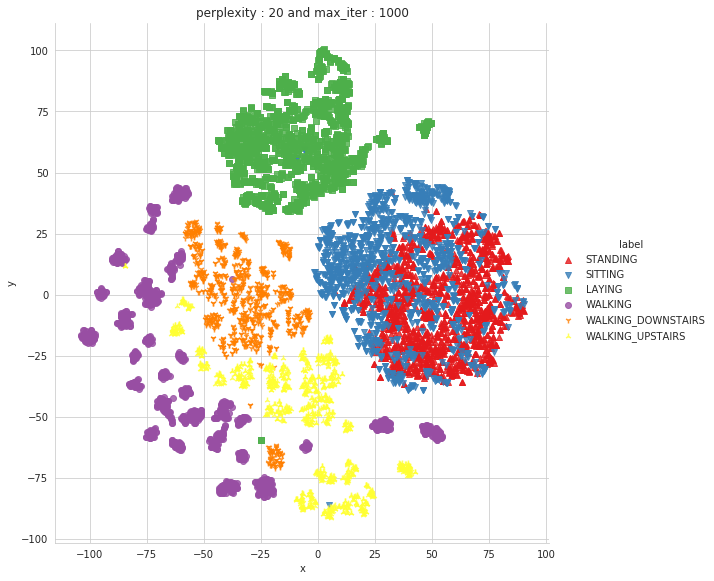

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.520s...
[t-SNE] Computed neighbors for 7352 samples in 88.255s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.936s
[t-SNE] Iteration 50: error = 86.5632019, gradient norm = 0.0174126 (50 iterations in 12.392s)
[t-SNE] Iteration 100: error = 75.5907974, gradient norm = 0.0046490 (50 iterat

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


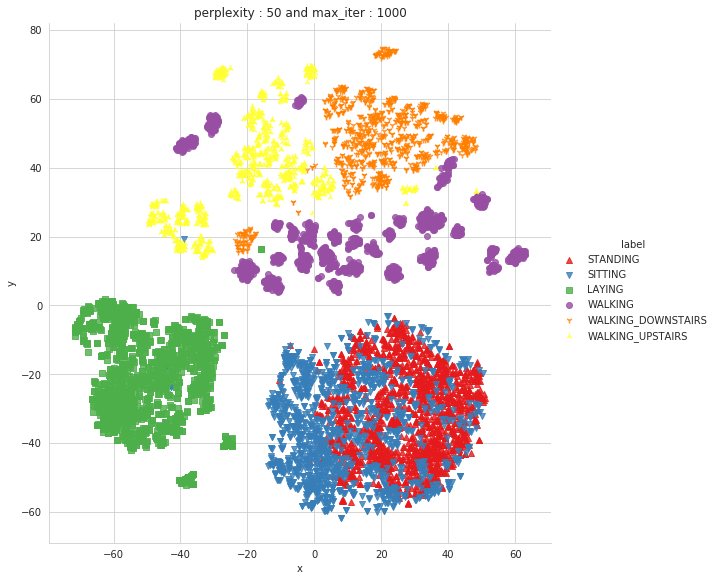

Done


In [93]:
X_pre_tsne = train.drop(['Subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

# Machine Learning Models

### Obtain the train and test data

In [94]:
train = pd.read_csv('UCI_HAR_Dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_Dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [95]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [96]:
X_train = train.drop(columns = ['Subject', 'Activity', 'ActivityName'])
y_train = train['ActivityName']
X_test = test.drop(columns = ['Subject', 'Activity', 'ActivityName'])
y_test = test['ActivityName']

In [97]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7352, 561) (7352,)
(2947, 561) (2947,)


# Let's model with our data

### Labels that are useful in plotting confusion matrix

In [139]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot the confusion matrix

In [140]:
import itertools
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm,classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    print(thresh)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
   
    # https://matplotlib.org/users/tight_layout_guide.html
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Generic function to run any model specified

In [141]:
from datetime import datetime
def perform_model(model, X_train,y_train, X_test, y_test, class_labels, cm_normalize = True, print_cm = True, \
                  cm_cmap = plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts running
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    # predict test data
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred    
    
    
    # Calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_test, y_pred)
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # Confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusion matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm,classes=class_labels, normalize = True, title = 'Normalized Confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test,y_pred)
    results['classification_report'] = classification_report
    print(classification_report)
    
   

    #     print(model.cv_results_)
    # add the trained model to the results
    results['model'] = model
    return results
    


### Method to print the gridsearch Attributes

In [142]:
def print_grid_search_attributes(model):
    # printing best estimator
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))     # \t gives one tab space
    
    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))

    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))

    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))
       

# 1. Logistic Regression with Grid Search

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  4.2min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:04:25.321039


testing time(HH:MM:SS:ms) - 0:00:00.012965


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  1 428  58   0   0   4]
 [  0  12 519   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]
0.5


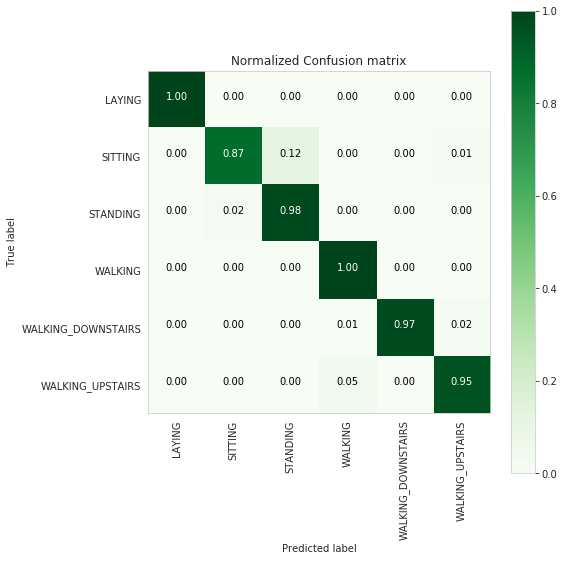

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

         micro avg       0.96      0.96      0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

{'mean_fit_time': array([ 3.11033249,  1.36991636,  4.25596046,  2.20510046,  5.42854516,
        4.74364511,  6.70972371, 12.41041478,  7.26822829, 14.17364899,
        7.39545449, 14.55246456]), 'std_fit_time': array([0.07743955, 0.01725568, 0.22193481, 0.05933537, 0.36647508,
       0.30742532, 0.17275021, 2.0054098

In [143]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

params = {'C':[0.01,0.1,1,10,20,30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid = params, cv=3, verbose=1)
log_reg_grid_results = perform_model(log_reg_grid, X_train,y_train, X_test, y_test, class_labels=labels, cm_normalize = True, print_cm = True, \
                  cm_cmap = plt.cm.Greens)

In [195]:
list=[]
for i in range(0,len(params['C'])):
    for j in range(0,len(params['penalty'])):
        list.append([params['C'][i],params['penalty'][j]])

t = tuple(list)
print(t)

([0.01, 'l2'], [0.01, 'l1'], [0.1, 'l2'], [0.1, 'l1'], [1, 'l2'], [1, 'l1'], [10, 'l2'], [10, 'l1'], [20, 'l2'], [20, 'l1'], [30, 'l2'], [30, 'l1'])


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.6min finished


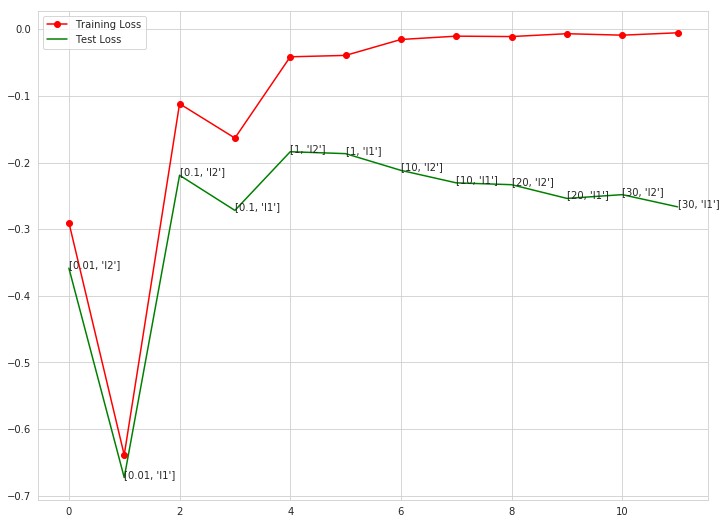

In [210]:
 # error plots
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
train_log_scores = [] 
test_log_scores = []
params = {'C':[0.01,0.1,1,10,20,30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid = params,scoring = 'neg_log_loss',cv=3, verbose=1)
log_reg_grid.fit(X_train, y_train)
log_reg_grid.cv_results_
plt.plot(range(0,12),log_reg_grid.cv_results_['mean_train_score'] , 'ro-', label='Training Loss')
plt.plot(range(0,12), log_reg_grid.cv_results_['mean_test_score'], 'g-', label='Test Loss')
for i,text in enumerate(t):
    plt.annotate((str(text)), (i,log_reg_grid.cv_results_['mean_test_score'][i]))

plt.legend()
plt.show()


268.5


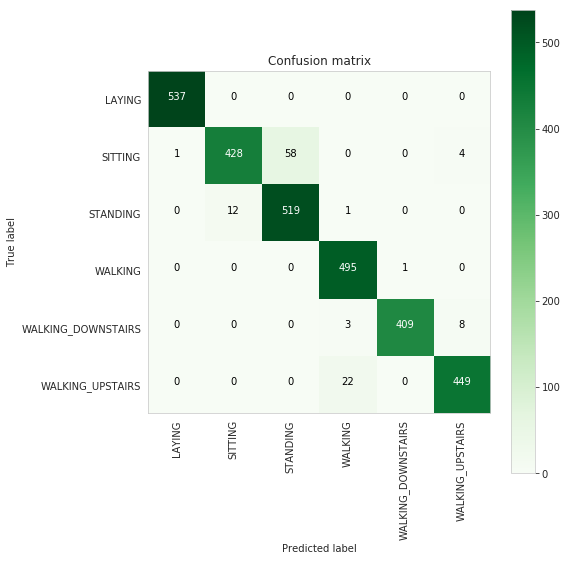

In [145]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], labels, cmap=plt.cm.Greens)
plt.show()

In [146]:
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9461371055495104



#  2. Linear SVC with GridSearch

In [211]:
from sklearn.svm import LinearSVC

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.1min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:01:13.054507


testing time(HH:MM:SS:ms) - 0:00:00.008979


---------------------
|      Accuracy      |
---------------------

    0.9674244994910078


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 433  53   0   0   3]
 [  0  12 519   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]
0.5


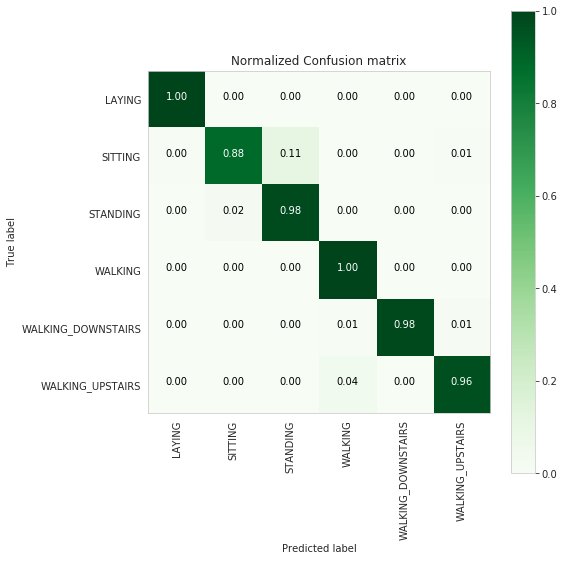

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.93       491
          STANDING       0.91      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

         micro avg       0.97      0.97      0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947

{'mean_fit_time': array([8.26557986, 8.14556678, 8.67780876, 9.46504045, 9.26856581,
       6.20807592]), 'std_fit_time': array([0.22544605, 0.44211763, 0.98631734, 0.37804318, 0.39366082,
       2.26586079]), 'mean_score_time': array([0.01961414, 0.02593064, 0.02194222, 0.0206124 , 0.02293873,
       0.01329772]), 'st

In [212]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
# https://stats.stackexchange.com/questions/255375/what-exactly-is-tol-tolerance-used-as-stopping-criteria-in-sklearn-models
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [213]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.5min finished


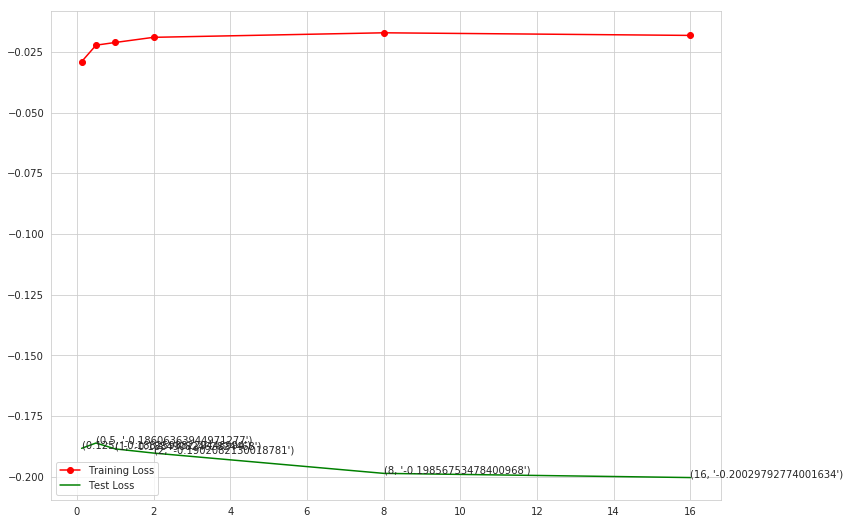

In [218]:
train_log_scores = [] 
test_log_scores = []
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
# https://stats.stackexchange.com/questions/255375/what-exactly-is-tol-tolerance-used-as-stopping-criteria-in-sklearn-models
lr_svc = SVC(kernel = 'linear', probability=True)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, scoring = 'neg_log_loss',n_jobs=-1, verbose=1)
lr_svc_grid.fit(X_train,y_train)
plt.plot(parameters['C'],lr_svc_grid.cv_results_['mean_train_score'] , 'ro-', label='Training Loss')
plt.plot(parameters['C'],lr_svc_grid.cv_results_['mean_test_score'] , 'g-', label='Test Loss')
for i, text in enumerate(lr_svc_grid.cv_results_['mean_test_score']):
    plt.annotate((parameters['C'][i],str(text)), (parameters['C'][i],lr_svc_grid.cv_results_['mean_test_score'][i]), textcoords='offset points')
plt.legend()
plt.show()

In [219]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
     verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9458650707290533



# 3.  Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:07:19.262694


testing time(HH:MM:SS:ms) - 0:00:02.625981


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]
0.5


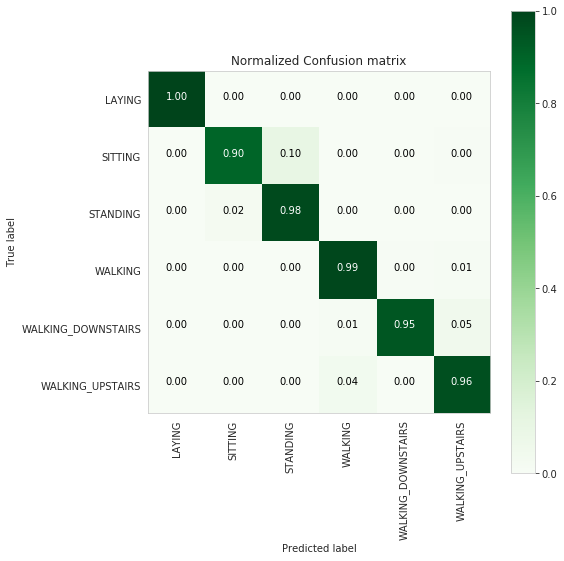

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

         micro avg       0.96      0.96      0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

{'mean_fit_time': array([ 4.46905708, 33.5633142 , 59.46610061,  3.41221293, 32.06199201,
       52.33880981,  3.02491601, 29.19033146, 46.58319044]), 'std_fit_time': array([0.14787679, 1.00633961, 1.40754099, 0.17381722, 0.86753154,
       0.15642771, 0.11251715, 1.13135787, 5.18053162]), 'mean_score_time': array([ 5.

In [221]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16], 'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [223]:
list=[]
for i in range(0,len(parameters['C'])):
    for j in range(0,len(parameters['gamma'])):
        list.append([parameters['C'][i],parameters['gamma'][j]])

t = tuple(list)
print(t)

([2, 0.0078125], [2, 0.125], [2, 2], [8, 0.0078125], [8, 0.125], [8, 2], [16, 0.0078125], [16, 0.125], [16, 2])


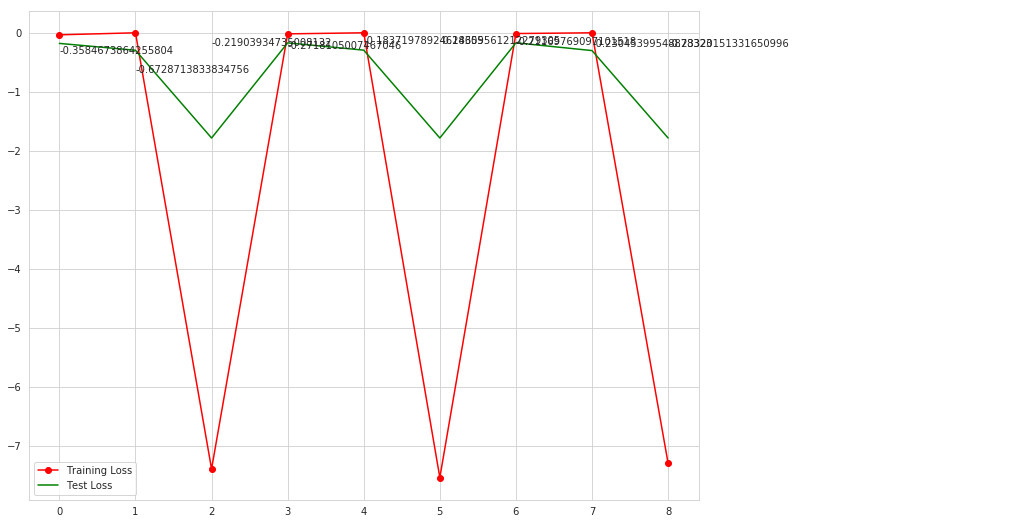

In [227]:
 # error plots
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
from sklearn.metrics import log_loss
train_log_scores = [] 
test_log_scores = []
parameters = {'C':[2,8,16], 'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf',probability=True)
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters,scoring = 'neg_log_loss', n_jobs=-1)
rbf_svm_grid.fit(X_train, y_train)
plt.plot(range(0,9),rbf_svm_grid.cv_results_['mean_train_score'] , 'ro-', label='Training Loss')
plt.plot(range(0,9), rbf_svm_grid.cv_results_['mean_test_score'], 'g-', label='Test Loss')
for i,text in enumerate(log_reg_grid.cv_results_['mean_test_score']):
    plt.annotate((str(text)), (i,log_reg_grid.cv_results_['mean_test_score'][i]))

plt.legend()
plt.show()


In [228]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9440968443960827



# 4. Decision Trees with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:17.447180


testing time(HH:MM:SS:ms) - 0:00:00.018949


---------------------
|      Accuracy      |
---------------------

    0.8649474041398032


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 386 105   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 471  17   8]
 [  0   0   0  12 347  61]
 [  0   0   0  73  29 369]]
0.5


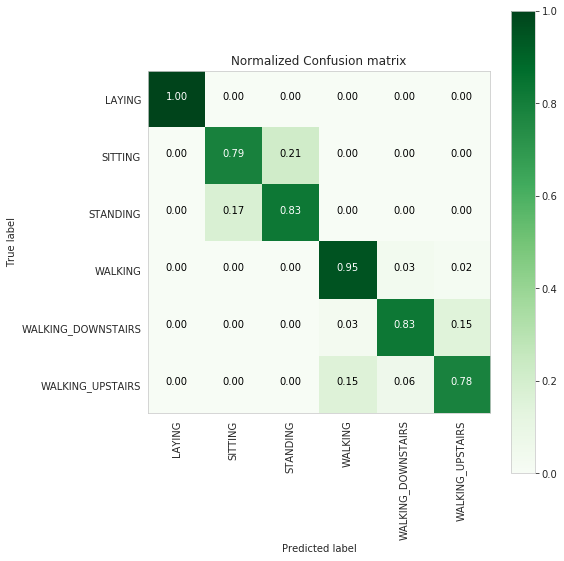

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.85      0.95      0.90       496
WALKING_DOWNSTAIRS       0.88      0.83      0.85       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

         micro avg       0.86      0.86      0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.87      0.86      0.86      2947

{'mean_fit_time': array([1.51761079, 1.82811483, 2.25297912, 2.78422356]), 'std_fit_time': array([0.081742  , 0.28802981, 0.29940903, 0.18132739]), 'mean_score_time': array([0.01562468, 0.01063824, 0.01097918, 0.01163586]), 'std_score_time': array([0.00235067, 0.00261673, 0.00292519, 0.00047058]), 'param_max_depth': ma

In [229]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

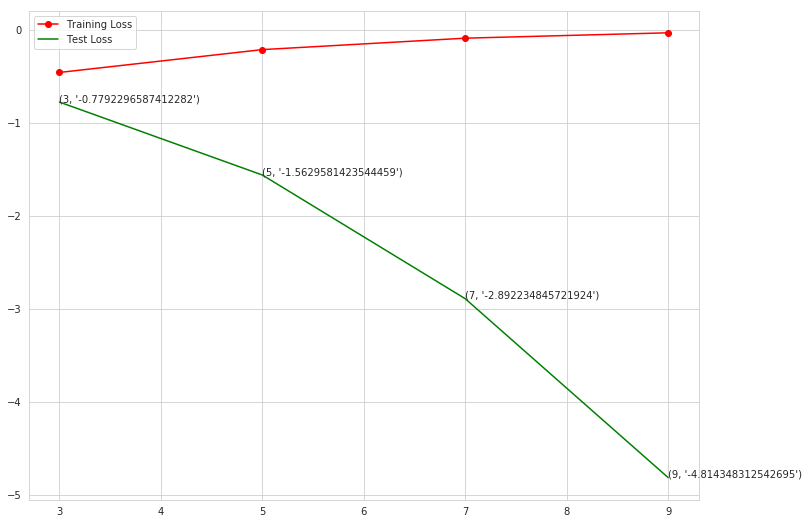

In [232]:
train_log_scores = [] 
test_log_scores = []
parameters = {'max_depth':np.arange(3,10,2)}
# https://stats.stackexchange.com/questions/255375/what-exactly-is-tol-tolerance-used-as-stopping-criteria-in-sklearn-models
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters,scoring = 'neg_log_loss', n_jobs=-1)
dt_grid.fit(X_train,y_train)
plt.plot(parameters['max_depth'],dt_grid.cv_results_['mean_train_score'] , 'ro-', label='Training Loss')
plt.plot(parameters['max_depth'],dt_grid.cv_results_['mean_test_score'] , 'g-', label='Test Loss')
for i, text in enumerate(dt_grid.cv_results_['mean_test_score']):
    plt.annotate((parameters['max_depth'][i],str(text)), (parameters['max_depth'][i],dt_grid.cv_results_['mean_test_score'][i]))
plt.legend()
plt.show()

# 5. Random Forest Classifier with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:06:04.548579


testing time(HH:MM:SS:ms) - 0:00:00.049865


---------------------
|      Accuracy      |
---------------------

    0.9134713267729895


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 420  71   0   0   0]
 [  0  44 488   0   0   0]
 [  0   0   0 483   9   4]
 [  0   0   0  31 340  49]
 [  0   0   0  41   6 424]]
0.5


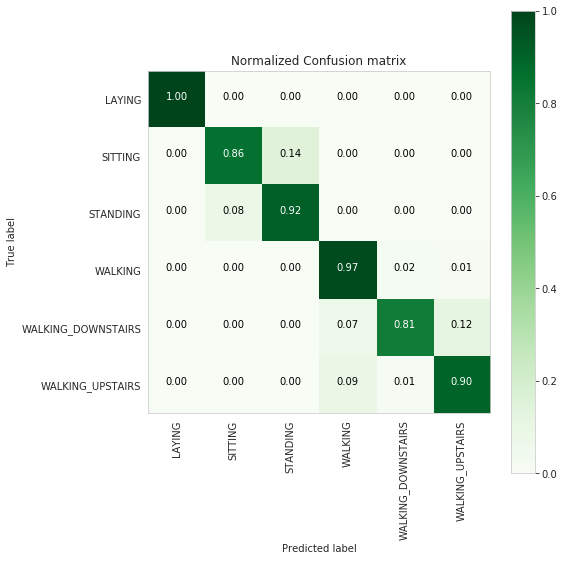

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.86      0.88       491
          STANDING       0.87      0.92      0.89       532
           WALKING       0.87      0.97      0.92       496
WALKING_DOWNSTAIRS       0.96      0.81      0.88       420
  WALKING_UPSTAIRS       0.89      0.90      0.89       471

         micro avg       0.91      0.91      0.91      2947
         macro avg       0.92      0.91      0.91      2947
      weighted avg       0.92      0.91      0.91      2947

{'mean_fit_time': array([ 0.45943872,  1.15723856,  1.89726106,  2.61168615,  3.26095184,
        3.95709133,  4.68281881,  5.38328052,  6.35235771,  7.32442713,
        0.70544608,  1.77093323,  2.82445153,  3.86467171,  4.94578306,
        6.11465923,  7.14889598,  8.25859785,  9.36663596, 10.43378512,
        0.7888

In [237]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

In [238]:
list=[]
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}

for i in range(0,len(params['n_estimators'])):
    for j in range(0,len(params['max_depth'])):
        list.append([params['n_estimators'][i],params['max_depth'][j]])

t = tuple(list)
print(t)
print(len(t))

([10, 3], [10, 5], [10, 7], [10, 9], [10, 11], [10, 13], [30, 3], [30, 5], [30, 7], [30, 9], [30, 11], [30, 13], [50, 3], [50, 5], [50, 7], [50, 9], [50, 11], [50, 13], [70, 3], [70, 5], [70, 7], [70, 9], [70, 11], [70, 13], [90, 3], [90, 5], [90, 7], [90, 9], [90, 11], [90, 13], [110, 3], [110, 5], [110, 7], [110, 9], [110, 11], [110, 13], [130, 3], [130, 5], [130, 7], [130, 9], [130, 11], [130, 13], [150, 3], [150, 5], [150, 7], [150, 9], [150, 11], [150, 13], [170, 3], [170, 5], [170, 7], [170, 9], [170, 11], [170, 13], [190, 3], [190, 5], [190, 7], [190, 9], [190, 11], [190, 13])
60


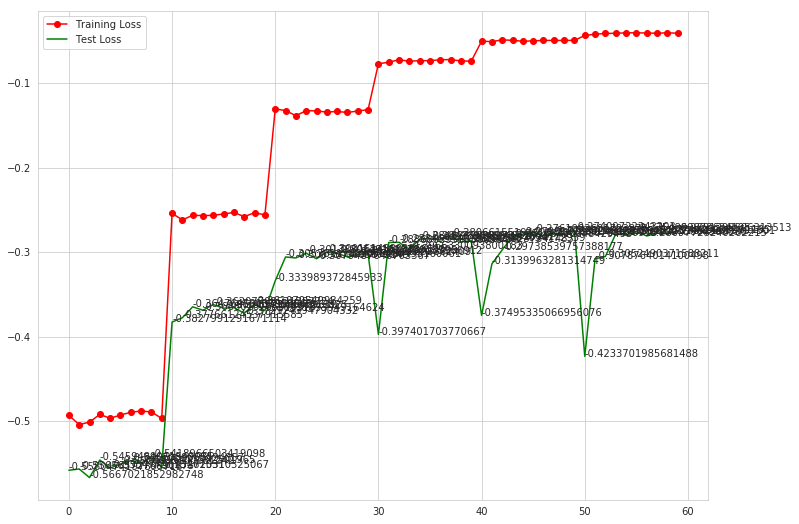

In [239]:
 # error plots
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
from sklearn.metrics import log_loss
train_log_scores = [] 
test_log_scores = []
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, scoring = 'neg_log_loss',n_jobs=-1)
rfc_grid.fit(X_train, y_train)
plt.plot(range(0,len(t)),rfc_grid.cv_results_['mean_train_score'] , 'ro-', label='Training Loss')
plt.plot(range(0,len(t)), rfc_grid.cv_results_['mean_test_score'], 'g-', label='Test Loss')
for i,text in enumerate(rfc_grid.cv_results_['mean_test_score']):
    plt.annotate((str(text)), (i,rfc_grid.cv_results_['mean_test_score'][i]))

plt.legend()
plt.show()


# 6.  Gradient Boosted Decision Trees With GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:45:25.449453


testing time(HH:MM:SS:ms) - 0:00:00.143616


---------------------
|      Accuracy      |
---------------------

    0.9205972175093315


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 395  95   0   0   1]
 [  0  38 494   0   0   0]
 [  0   0   0 483   7   6]
 [  0   0   0  11 374  35]
 [  0   1   0  34   6 430]]
0.5


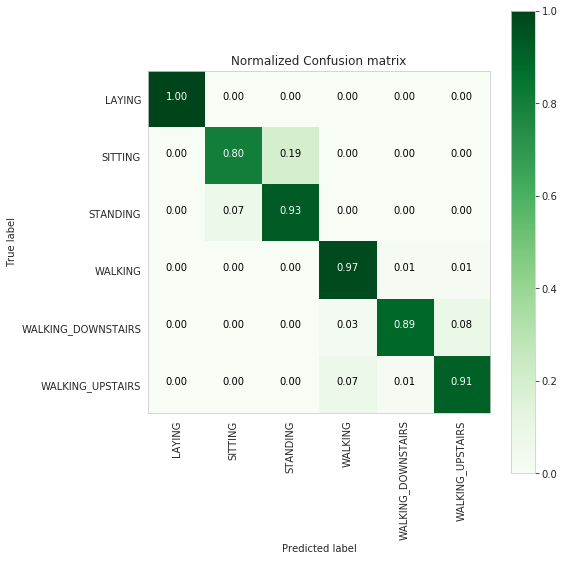

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.80      0.85       491
          STANDING       0.84      0.93      0.88       532
           WALKING       0.91      0.97      0.94       496
WALKING_DOWNSTAIRS       0.97      0.89      0.93       420
  WALKING_UPSTAIRS       0.91      0.91      0.91       471

         micro avg       0.92      0.92      0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947

{'mean_fit_time': array([292.22215382, 285.41301656, 280.09987823, 283.27173654,
       259.52818211, 266.33998036, 267.70134258, 264.14418165,
       259.58004228, 257.6801556 , 254.80650194, 245.3264637 ]), 'std_fit_time': array([11.30297115, 10.05855089, 13.09962622, 14.77389146, 10.76247114,
       12.66734174,  6.

In [240]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

In [244]:
list=[]
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
for i in range(0,len(param_grid['max_depth'])):
    for j in range(0,len(param_grid['n_estimators'])):
        list.append([param_grid['max_depth'][i],param_grid['n_estimators'][j]])

t = tuple(list)
print(t)
print(len(t))

([5, 130], [5, 140], [5, 150], [5, 160], [6, 130], [6, 140], [6, 150], [6, 160], [7, 130], [7, 140], [7, 150], [7, 160])
12


In [246]:
gbdt_grid.cv_results_

{'mean_fit_time': array([533.27934162, 535.63706112, 531.16903551, 530.32321938,
        485.31197119, 487.30629857, 498.98765794, 507.44373846,
        473.62181298, 475.06791377, 472.39098104, 445.20270896]),
 'std_fit_time': array([21.86762447, 23.6743767 , 23.54922346, 25.80546878, 16.93015794,
        18.30898718, 26.6970207 , 13.15746611,  3.8297712 ,  5.43027741,
         5.73500119,  8.75481369]),
 'mean_score_time': array([0.2062997 , 0.2104373 , 0.20341134, 0.20511929, 0.18577568,
        0.20637441, 0.22971996, 0.218407  , 0.18380086, 0.17417971,
        0.19097408, 0.12835677]),
 'std_score_time': array([0.00878163, 0.01431455, 0.00659757, 0.00124386, 0.00920995,
        0.03506679, 0.02634062, 0.03635952, 0.02219733, 0.00329334,
        0.01033077, 0.01802808]),
 'param_max_depth': masked_array(data=[5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_

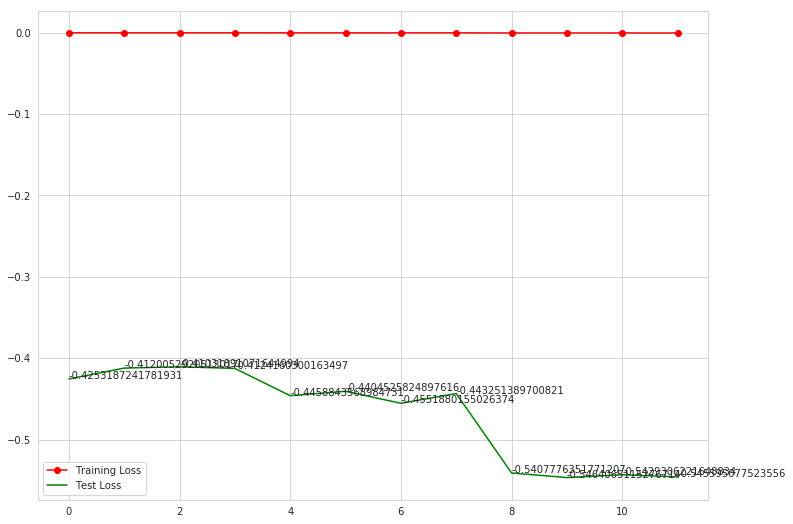

In [245]:
 # error plots
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
from sklearn.metrics import log_loss
train_log_scores = [] 
test_log_scores = []
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, scoring = 'neg_log_loss',n_jobs=-1)
gbdt_grid.fit(X_train, y_train)
plt.plot(range(0,len(t)),gbdt_grid.cv_results_['mean_train_score'] , 'ro-', label='Training Loss')
plt.plot(range(0,len(t)), gbdt_grid.cv_results_['mean_test_score'], 'g-', label='Test Loss')
for i,text in enumerate(gbdt_grid.cv_results_['mean_test_score']):
    plt.annotate((str(text)), (i,gbdt_grid.cv_results_['mean_test_score'][i]))

plt.legend()
plt.show()


### Machine learning models results

In [247]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.27%       3.733%
Linear SVC          : 96.74%       3.258% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 86.49%      13.51% 
Random Forest       : 91.35%      8.653% 
GradientBoosting DT : 91.35%      8.653% 


# Deep learning Models

In [263]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

### Data

In [264]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [265]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace = True, header = None)

# Utility function to load the data
def load_signals(subset):
    signals_data = []
    
    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(_read_csv(filename).as_matrix())
        
    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))
    

In [266]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [267]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, y_train = load_signals('train'), load_y('train')
    X_test, y_test = load_signals('test'), load_y('test')
    return X_train, X_test, y_train, y_test


In [268]:
import sys
sys.path.insert(0,'C:\\Users\\nrtsa\\AppData\\Local\\Programs\\Python\\Python37\\Lib\\site-packages')

In [269]:
# Importing tensorflow
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [270]:
# Configuring a session
# https://stackoverflow.com/questions/41233635/meaning-of-inter-op-parallelism-threads-and-intra-op-parallelism-threads

session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [271]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [272]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [273]:
# Loading the train and test data
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
X_train, X_test, y_train, y_test = load_data()

In [274]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7352, 128, 9) (7352, 6)
(2947, 128, 9) (2947, 6)


In [275]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [276]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [20]:
import warnings
warnings.filterwarnings("ignore")
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

# Initialize the sequence model
model = Sequential()
# configuring the parameters
model.add(LSTM(n_hidden, input_shape = (timesteps,input_dim)))
# adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [31]:
# Training the model
history = model.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 63s 9ms/step - loss: 0.1696 - acc: 0.9441 - val_loss: 0.3744 - val_acc: 0.8999
Epoch 2/30
7352/7352 [==============================] - 62s 8ms/step - loss: 0.1607 - acc: 0.9479 - val_loss: 0.3723 - val_acc: 0.9033
Epoch 3/30
7352/7352 [==============================] - 62s 8ms/step - loss: 0.1896 - acc: 0.9422 - val_loss: 0.3967 - val_acc: 0.8962
Epoch 4/30
7352/7352 [==============================] - 62s 8ms/step - loss: 0.1576 - acc: 0.9479 - val_loss: 0.5031 - val_acc: 0.8979
Epoch 5/30
7352/7352 [==============================] - 62s 8ms/step - loss: 0.1634 - acc: 0.9486 - val_loss: 0.4012 - val_acc: 0.9030
Epoch 6/30
7352/7352 [==============================] - 62s 8ms/step - loss: 0.1763 - acc: 0.9436 - val_loss: 0.6412 - val_acc: 0.8853
Epoch 7/30
7352/7352 [==============================] - 68s 9ms/step - loss: 0.1926 - acc: 0.9476 - val_loss: 0.5751 - val_acc: 0.8819
Epoch 8

In [32]:
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [33]:
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)

Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,510,0,27,0,0,0
SITTING,0,392,95,0,0,4
STANDING,0,88,444,0,0,0
WALKING,0,0,0,432,53,11
WALKING_DOWNSTAIRS,0,0,0,6,413,1
WALKING_UPSTAIRS,0,3,4,6,7,451


In [34]:
score = model.evaluate(X_test, y_test)
score

2947/2947 [==============================] - 2s 668us/step


[0.5601804945723646, 0.8965049202578894]

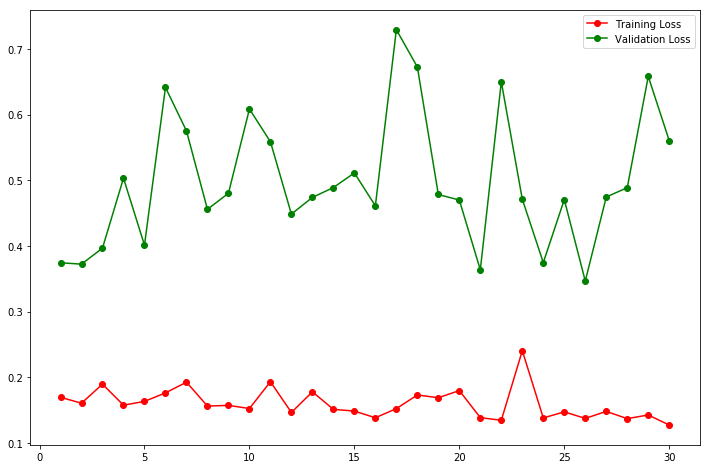

In [35]:
# Error plots
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
loss = history.history['loss']                         
val_loss = history.history['val_loss']                  
epochs = range(1, 31)
plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'go-', label = 'Validation Loss')
plt.legend()

In [36]:
confusion_matrix(y_test,y_pred)

Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,510,0,27,0,0,0
SITTING,0,392,95,0,0,4
STANDING,0,88,444,0,0,0
WALKING,0,0,0,432,53,11
WALKING_DOWNSTAIRS,0,0,0,6,413,1
WALKING_UPSTAIRS,0,3,4,6,7,451


###### Accuracy is 89.65%

## LSTM - 2layers

In [37]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden1 = 100
n_hidden2 = 64
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden1, return_sequences=True,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.2))
model.add(LSTM(n_hidden2))
model.add(Dropout(0.3))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128, 100)          44000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128, 100)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 86,630
Trainable params: 86,630
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [39]:
# Training the model
history = model.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 197s 27ms/step - loss: 1.0537 - acc: 0.5424 - val_loss: 0.8287 - val_acc: 0.6569
Epoch 2/30
7352/7352 [==============================] - 194s 26ms/step - loss: 0.6602 - acc: 0.7165 - val_loss: 0.6030 - val_acc: 0.7503
Epoch 3/30
7352/7352 [==============================] - 195s 27ms/step - loss: 0.4824 - acc: 0.7928 - val_loss: 0.4916 - val_acc: 0.8269
Epoch 4/30
7352/7352 [==============================] - 193s 26ms/step - loss: 0.2586 - acc: 0.9116 - val_loss: 0.3788 - val_acc: 0.8918
Epoch 5/30
7352/7352 [==============================] - 193s 26ms/step - loss: 0.2310 - acc: 0.9233 - val_loss: 0.2900 - val_acc: 0.9074
Epoch 6/30
7352/7352 [==============================] - 193s 26ms/step - loss: 0.1886 - acc: 0.9357 - val_loss: 0.3568 - val_acc: 0.9033
Epoch 7/30
7352/7352 [==============================] - 193s 26ms/step - loss: 0.1628 - acc: 0.9415 - val_loss: 0.2674 - val_acc: 

In [40]:
score = model.evaluate(X_test, y_test)
score

2947/2947 [==============================] - 8s 3ms/step


[0.4962948187723161, 0.9083814048184594]

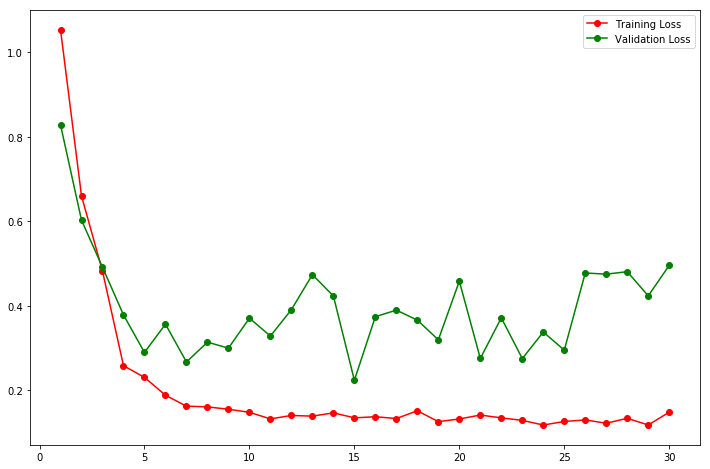

In [41]:
# Error plots
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
loss = history.history['loss']                         
val_loss = history.history['val_loss']                  
epochs = range(1, 31)
plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'go-', label = 'Validation Loss')
plt.legend()

###### Accuracy is 92%

## Optimizing using GridSearchCV

In [277]:
batch_size = 16
n_hidden1 = 100
n_hidden2 = 64

In [278]:
# Create function returning a compiled network
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
def create_network(init='glorot_uniform'):
    
    # Start neural network
    network = Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(LSTM(n_hidden1, return_sequences=True,input_shape=(timesteps, input_dim)))
    network.add(Dropout(0.5))
    network.add(LSTM(n_hidden2))
    network.add(Dropout(0.3))
    # Add fully connected layer with a sigmoid activation function
    network.add(Dense(n_classes, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Optimizer
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

In [279]:
# Wrap Keras model so it can be used by scikit-learn
from keras.wrappers.scikit_learn import KerasClassifier
neural_network = KerasClassifier(build_fn=create_network, verbose=0)

In [280]:
# Create hyperparameter space
epochs = [5, 10,15]

init_modes = ['normal', 'glorot_normal']
# Create hyperparameter options
hyperparameters = dict(epochs=epochs, init=init_modes)

In [290]:
# Create grid search
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)

# Fit grid search
model = grid.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=(X_test, y_test))

In [291]:
grid.cv_results_

{'mean_fit_time': array([ 547.40757704,  848.42426499, 1217.44573522, 1328.38680307,
        2242.47453753, 2286.31293233]),
 'std_fit_time': array([ 13.99230528, 191.07130185,  19.33467166,  54.2674935 ,
         33.92105233,  72.5686329 ]),
 'mean_score_time': array([ 6.49764975, 11.87332622,  8.38659271,  8.58606911, 10.34005006,
        10.57807891]),
 'std_score_time': array([0.33674571, 2.70655358, 0.44683318, 0.43586823, 0.33025293,
        0.6320519 ]),
 'param_epochs': masked_array(data=[5, 5, 10, 10, 15, 15],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_init': masked_array(data=['normal', 'glorot_normal', 'normal', 'glorot_normal',
                    'normal', 'glorot_normal'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'epochs': 5, 'init': 'normal'},
  {'epochs': 5, 'init': 'glorot_normal'},
  {'epochs': 10, 'init

In [292]:
grid.best_params_

{'epochs': 15, 'init': 'normal'}

In [294]:
# epochs = [5, 10,15]
# init_modes = ['normal', 'glorot_normal']
# list=[]
# for i in range(0,len(epochs)):
#     for j in range(0,len(init_modes)):
#         list.append([epochs[i],init_modes[j]])

# t = tuple(list)
# print(t)

In [293]:
#  # error plots
# fig_size = plt.rcParams["figure.figsize"]
# fig_size[0] = 12
# fig_size[1] = 9
# plt.rcParams["figure.figsize"] = fig_size
# from sklearn.metrics import log_loss

# plt.plot(range(0,len(t)),grid.cv_results_['mean_train_score'] , 'ro-', label='Training Loss')
# plt.plot(range(0,len(t)), grid.cv_results_['mean_test_score'], 'g-', label='Test Loss')
# for i,text in enumerate(grid.cv_results_['mean_test_score']):
#     plt.annotate((str(text)), (i,grid.cv_results_['mean_test_score'][i]))

# plt.legend()
# plt.show()


In [295]:
grid.best_score_

0.974950130635688

## Accuracy is 97.49%

## Process

1. For each person with the help of accelerometer and gyroscope in the smartphone, the data(3-axial linear acceleration'(tAcc-XYZ) from accelerometer and '3-axial angular velocity' (tGyro-XYZ) from Gyroscope with several variations) is collected for each activity. It is a multi-class classification problem where each data point belong to one of the six classes(Activities).
2. In each time series data signals are preprocessed by applying noise filters and then sampled in fixed-width windows of 2.56 seconds each with 50% overlap. ie., each window has 128 readings(128D)
3. The accelertion signal was saperated into Body and Gravity acceleration signals(tBodyAcc-XYZ and tGravityAcc-XYZ).
4. Now using this initial data(raw data), finally experts have generated 561 features using the domain knowledge
5. Exploratory Data Analysis is performed on the expert generated features to find whether the features can seperate the activities or not.
6. Then several Machine learning algorithms are applied on these features and the results are tabulated.
7. Out of all the models, LinearSVC has performed well with an accuracy of 96.74%.
8. Then on the raw features, Deep learning model(LSTM) is applied and got an accuracy of 90.4%
9. To optimize the model, gridsearch is performed on the epochs and initializer. With this, the model accuracy has been increased to 97.49% which is very high.
10. The best initializer is found to be 'glorot_normal' and the best epochs is 15.